In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from dt import DecisionTreeClassifier

# Exploratory Data Analysis (EDA)

#### Read Dataset

In [25]:
iris = pd.read_csv("Iris.csv");

Improve dataset: Remove id column, Change Class labels that are given in the last column to integer values(0, 1, 2)

In [26]:
iris = iris.drop(columns="Id");
spc = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris["Species"] = [spc[item] for item in iris["Species"]];

#### Dataset Summary

General image of dataset

In [27]:
display(iris);

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Summary of each Features data

In [28]:
sl=iris["SepalLengthCm"].describe();
sw=iris["SepalWidthCm"].describe();
pl=iris["PetalLengthCm"].describe();
pw=iris["PetalWidthCm"].describe();

print(sl);
print(sw);
print(pl);
print(pw);

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


Duplicate data in the dataset

In [29]:
display(iris[iris.duplicated()])
display(iris.duplicated().sum())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


3

Checking balance of dataset

c:\Users\HasanErdemAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


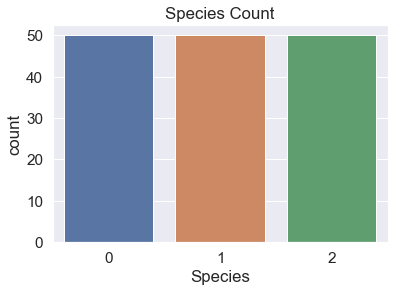

In [30]:
plt.title("Species Count")
sns.countplot(iris["Species"]);

As seen above, dataset is balanced, removing duplicates break the balance of our dataset. Checking, if any null value exists in the dataset

In [31]:
display(iris.isnull().sum(axis=0))

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Pair-plots for features

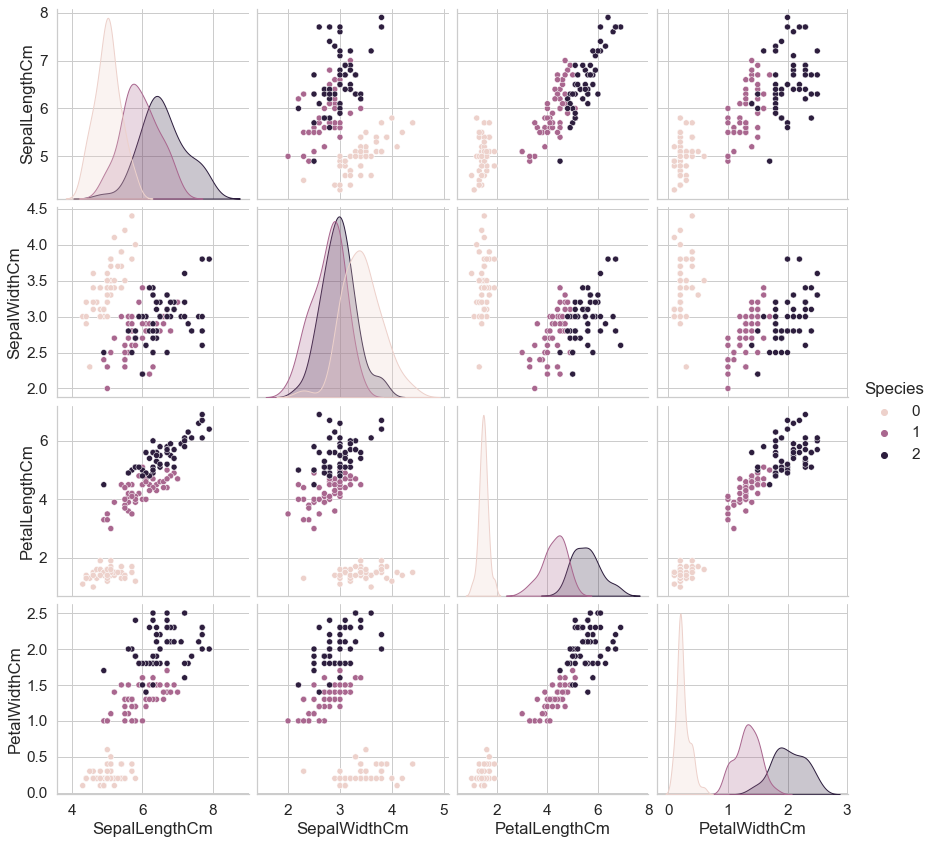

In [32]:
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", height=3);
plt.show();

When compare species according to their features, Setosa appears to have more characteristic features compared to other species and it can be observed that the characteristics of Versicolor and Virginia are closer.

##### Correlation Matrix of Features - Correlation Matrix of Features and Target

Feature columns: SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm Target columns: Species

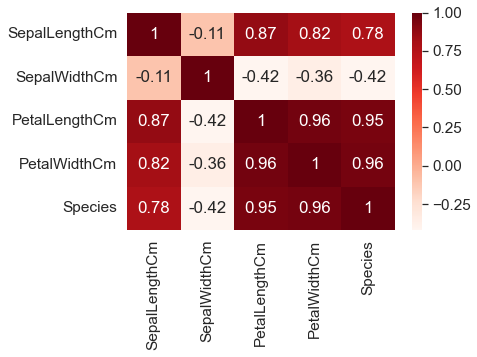

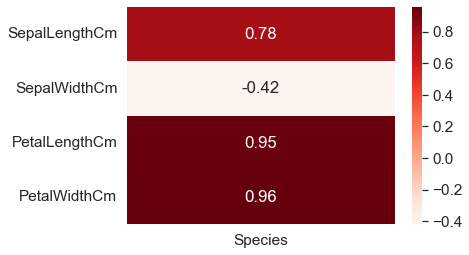

In [33]:
cm = iris.corr()
ft = cm.drop(columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]);
ft = ft.drop(labels=["Species"]);

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.show()

sns.set(font_scale=1.4)
sns.heatmap(ft, annot=True, cmap=plt.cm.Reds)
plt.show()

As seen above, when we observe the correlation between features; Petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

When we observe the correlation of species and feature; it can be expected that; Virginica sepal_width can be smaller than sepal_width of versicolor and setosa also petal_length and petal_width of virginica can be highest.

# Train the classifier

In [34]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test

In [35]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

### Train The Classifier

In [36]:
clf.fit(X_train_list,y_train_list);

### Predict Class of Test values

In [37]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0]
Prediction
[1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0]
Train Features Expected Classification
[0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1]
Prediction
[0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 

# Results

### Confusion Matrix of Test

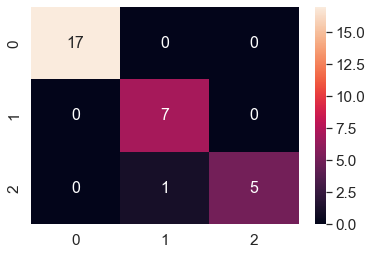

In [38]:
y_pred2 = pd.Series(yhat);
y_test2 = pd.Series(y_test_list);
mt=metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.show()

17+7+5=29 classification TP: True Positive;

confusion_matrix[3:2] -> TN:True Negative for class0,

confusion_matrix[3:2] -> FP:False Positive for class2,

### Confusion Matrix of Train

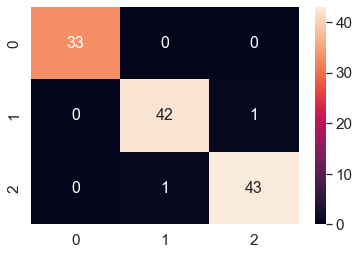

In [39]:
x_pred2 = pd.Series(xhat);
x_test2 = pd.Series(y_train_list);
mt = metrics.confusion_matrix(x_test2, x_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.show()

### F1-Score

In [40]:
f1 = metrics.f1_score(y_test2, y_pred2, average='weighted');
print("F1-Score Test:")
print(f1)

f2 = metrics.f1_score(x_test2, x_pred2, average='weighted');
print("F1-Score Train:")
print(f2)

F1-Score Test:
0.9662626262626262
F1-Score Train:
0.9833333333333333


### Accuracy

In [41]:
accuracy = metrics.accuracy_score(y_test2, y_pred2);
print("Accuracy Test")
print(accuracy);

accuracy2 = metrics.accuracy_score(x_test2, x_pred2);
print("Accuracy Train")
print(accuracy2);


Accuracy Test
0.9666666666666667
Accuracy Train
0.9833333333333333


### Precision

In [42]:
precision = metrics.precision_score(y_test2, y_pred2, average='weighted');
print("Precision Test:")
print(precision);

precision2 = metrics.precision_score(x_test2, x_pred2, average='weighted');
print("Precision Train:")
print(precision2);


Precision Test:
0.9708333333333333
Precision Train:
0.9833333333333333


### Recal

In [43]:
recall = metrics.recall_score(y_test2, y_pred2, average='weighted');
print("Recall Test:")
print(recall);

recall2 = metrics.recall_score(x_test2, x_pred2, average='weighted');
print("Recall Train:")
print(recall2);


Recall Test:
0.9666666666666667
Recall Train:
0.9833333333333333


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

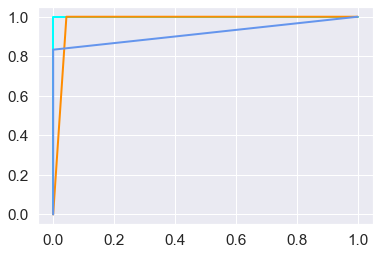

In [44]:
y_testb = label_binarize(y_test2, classes=[0, 1, 2]);
y_predb = label_binarize(y_pred2, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_testb[:,i], y_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]));
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]);

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw=2,
    label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

#### Observations:

- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.